# 8.1 Binomial Coefficients

\begin{align}
    & C(p,N) + C(p, N-1) \\
    =\ & 2 \sum^{N-1}_{k=0}{{p-1}\choose{k}} + 2 \sum^{N-2}_{k=0}{{p-1}\choose{k}} \\
    =\ & 2 \sum^{N-1}_{k=0}{{p-1}\choose{k}} + 2 \sum^{N-1}_{k=1}{{p-1}\choose{k-1}} \\
    =\ & 2 \sum^{N-1}_{k=0}{{p-1}\choose{k}} + 2 \sum^{N-1}_{k=0}{{p-1}\choose{k-1}} - 2\underbrace{2 {p-1}\choose{0-1}}_{0} \\
    =\ & 2 \sum^{N-1}_{k=0}{ [{{p-1}\choose{k}} + {{p-1}\choose{k-1}}] } \\
    \overset{(2)}{=}\ & 2 \sum^{N-1}_{k=0}{ {{p}\choose{k}} } \\
    =\ & C(p+1,N)
\end{align}

# 8.2 Geometry of Linear Classification

In [1]:
import numpy as np
import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as pp
%matplotlib inline
%autocall 1

Automatic calling is: Smart


w = (0.35, 0.36)


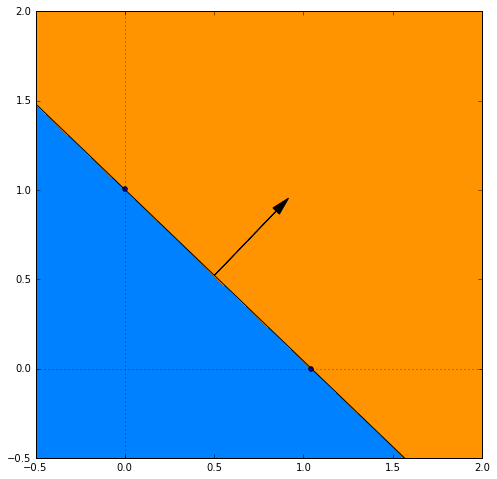

In [2]:
def visualize_binary_classifier():
    while True:
        w = np.random.rand(2)
        w = w/np.linalg.norm(w)/2.
        b = np.random.rand(1)[0]/2.

        X = np.array([-0.5, 2])
        # from solving w.T.dot(x) - b == 0 for x1 (which is Y)
        Y = (-w[0]*X + b)/w[1]
        
        # get a base for the arrow
        x = b/w[1] / 2.
        y = (-w[0]*x + b)/w[1]
        
        # if the axes intercepts aren't within plotting range, generate everything anew
        if b/w[0] >= 2 or b/w[1] >= 2:
            continue
        
        print("w = (%.2f, %.2f)" % (w[0], w[1]))
        ax = pp.figure(figsize=(8,8)).add_subplot(1,1,1)
        pp.arrow(x, y, w[0], w[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
        pp.xlim(-0.5, 2)
        pp.ylim(-0.5, 2)
        ax.set_xticks([0], minor=True)
        ax.set_yticks([0], minor=True)
        pp.grid(which="minor")

        # plot analytically found decision boundary
        pp.plot(X, Y, color="black", lw=1)

        # plot empirical decision boundary
        n = 500
        X = np.array(np.mgrid[-0.5:2:2.5/n, -0.5:2:2.5/n]).reshape(2,n**2)
        Z = np.sign(w.T.dot(X) - b)
        pp.contourf(X[0,:].reshape(n,n), X[1,:].reshape(n,n), Z.reshape(n,n), 1)

        # axes intercepts
        pp.scatter([0, b/w[0]], [b/w[1], 0])

        break
    return

visualize_binary_classifier()

**(a)**

The decision boundary is a hyperplane defined by $(w^Tx - b = 0)$. $w$ decides the orientation, $b$ the offset from the origin. $w$ points in the direction of positive classification values $y(x)$.

**(b)** 

A linear classifier divides the input space into two half-spaces. The *shattering coefficient* $s_{halfspaces}(n)$ then is the largest number of subsets that can be formed by intersecting *any* one input set $X$ of $n$ points using half-spaces.

$s_{H}(n) = \underset{X \subseteq \Omega \\ |X| = n}{max}\ |\{X \cap H_i \mid H_i \in H\}|$

So $s_{H}(n) \leq 2$  for a linear classifier?
Or should H be the set of all possible half-spaces (all possible $w, b$) (s(n) = the number of ways to split the input set)?

The *VC-dimension* $d_{VC}$ provides an upper bound to the shattering coefficient: $ln(s(n)) \leq d_{VC}(1+ln\frac{p}{d_{VC}})$.
It provides a measure of the capacity of the separation capabilities of the separator function class H. If we can find n points, that can be shattered by H (that is, H can separate all possible binary labelings of the points), then VC(H) = n. It is sufficient, that some such example of n points exists (fixed points, but H must shatter them for all possible labelings).

Small VC-dimensions are often applicable for real life data, since close points will have same labels, so separator classes with low VC-dimensions (low complexity models) might actually be preferrable.

# 8.3 The primal SRM problem

#### (a) effect of the margin on generalization
The margin is the lowest distance between the decision boundary and the closest datapoints. The margin of a canonical hyperplane is set to be $d = \frac{1}{|w|}$ by choosing $|w|$ appropriately. A low margin means higher model complexity $C$, which means we might get a worse upper bound for the generalization error $E^G < E^T + C$, even if the separate the training set perfectly (overfitting). A high margin reduces model complexity, but increases the training error (underfitting).

#### (b)

w = (0.35, 0.36)
1.76499942589
1.76499942589


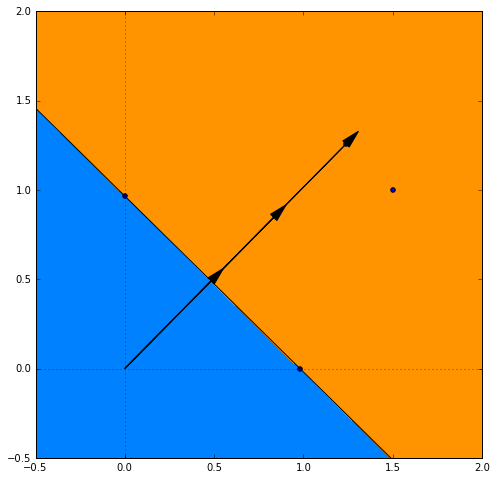

In [39]:
def plot_point(x):
    pp.scatter(x[0], x[1])
def plot_arrow(x, s=[0, 0]):
    pp.arrow(s[0], s[1], x[0], x[1], head_width=0.05, head_length=0.1, fc='k', ec='k')

def visualize_binary_classifier():
    while True:
        w = np.random.rand(2)
        w = w/np.linalg.norm(w)/2.
        b = np.random.rand(1)[0]/2.

        X = np.array([-0.5, 2])
        # from solving w.T.dot(x) - b == 0 for x1 (which is Y)
        Y = (-w[0]*X + b)/w[1]
        
        # get a base for the arrow
        x = b/w[1] / 2.
        y = (-w[0]*x + b)/w[1]
        
        # if the axes intercepts aren't within plotting range, generate everything anew
        if b/w[0] >= 2 or b/w[1] >= 2:
            continue
        
        print("w = (%.2f, %.2f)" % (w[0], w[1]))
        ax = pp.figure(figsize=(8,8)).add_subplot(1,1,1)
#         pp.arrow(x, y, w[0], w[1], head_width=0.05, head_length=0.1, fc='k', ec='k')
        plot_arrow(w, [x,y])
        pp.xlim(-0.5, 2)
        pp.ylim(-0.5, 2)
        ax.set_xticks([0], minor=True)
        ax.set_yticks([0], minor=True)
        pp.grid(which="minor")

        # plot analytically found decision boundary
        pp.plot(X, Y, color="black", lw=1)

        # plot empirical decision boundary
        n = 500
        X = np.array(np.mgrid[-0.5:2:2.5/n, -0.5:2:2.5/n]).reshape(2,n**2)
        Z = np.sign(w.T.dot(X) - b)
        pp.contourf(X[0,:].reshape(n,n), X[1,:].reshape(n,n), Z.reshape(n,n), 1)

        # axes intercepts
        pp.scatter([0, b/w[0]], [b/w[1], 0])

        break
    
    basepoint = np.array([x,y])
    # choose closest datapoint x
    xc = np.array([1.5, 1.0])
    plot_point(xc)
    # project on w
    xTw = xc.T.dot(w)
    proj = (xTw * w)/(np.linalg.norm(w)**2)
    plot_point(proj)
    plot_arrow(proj)
    # calc distance
    a = b/xTw
    plot_arrow(proj*a)
    
    print(xTw/np.linalg.norm(w))
    print(np.linalg.norm(proj))
    
    return

visualize_binary_classifier()

In [37]:
def test():
    w = np.random.rand(3)[:,np.newaxis]
    x = np.random.rand(3)[:,np.newaxis]
    print(w.T.dot(w))
    print(np.linalg.norm(w)**2)
    
    for i in range(20):
        p, w = np.random.rand(2)*2. - 1.
        w = np.abs(w)
        print(p, w, p-(w*(p-1))/(p))
test()

[[ 0.70881322]]
0.70881321689
0.744408547926 0.0994879024459 0.778567555799
-0.565701930197 0.147344434201 -0.973509386239
-0.994826689541 0.582010453899 -2.16187417553
-0.124778151349 0.909191622529 -8.3204346934
-0.608886406513 0.600987744133 -2.19690184203
-0.375880568821 0.239637661996 -1.25305494294
-0.484650549449 0.0667291539361 -0.689064792181
-0.347132929946 0.826697135639 -3.55533024699
-0.743276321538 0.72388069205 -2.44106223709
0.050264995799 0.247868488134 4.73363114111
0.338376253393 0.992116332565 2.27825152076
0.887107615174 0.66726395965 0.972022926941
0.336164338037 0.504376337778 1.33217421232
0.459329653912 0.565454980682 1.12491859967
0.408939098586 0.506335542977 1.14077213555
0.256294030392 0.658395205275 2.16680456306
-0.434281277684 0.880977074834 -3.34384470911
0.495428974352 0.372844576671 0.875153577065
-0.838561344747 0.647013534211 -2.2571505523
-0.098669196826 0.572069563976 -6.46859242109


#### (c) Write down and explain the primal optimization problem of model selection through structural risk minimization (SRM)

Primal Problem:

minimize $f_{0}(x)$ subject to $f_{k}(x) \leq 0$, $k=1,...,m$, which in our case is:

minimize $\frac{1}{2}|w|^2$ subject to $-y_T^{(\alpha)}((w^Tx^{(\alpha)}+b)-1) \leq 0$

This means we wish to find the largest margin $\frac{1}{|w|}$, that seperates all training datapoints:

$y_T^{(\alpha)}(w^Tx^{(\alpha)} + b) \geq 1 \quad \forall \alpha$

holds for 
$y_T^{(\alpha)} \in \{-1, 1\}, \quad \forall \alpha$ and

$ w^Tx^{(\alpha)} + b \geq y_T^{(\alpha)} \quad \forall y_T^{(\alpha)} = 1$, 

$ w^Tx^{(\alpha)} + b \leq y_T^{(\alpha)} \quad \forall y_T^{(\alpha)} = -1$

The constraint term at the top is just a concise rewrite of these 2 inequalities.

Since the objective function $\frac{1}{2}|w|^2$ is convex, it only has one optimal solution. And since this is a standard formulation, we can use solvers to solve it. The solution should classify all training points perfectly ($E^T = 0$), while minimizing the complexity $C$.

# 8.4 The dual problem for the Support Vector Machine

# 8.5 Kernel Construction

In [15]:
for i in range(100): print("")